In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

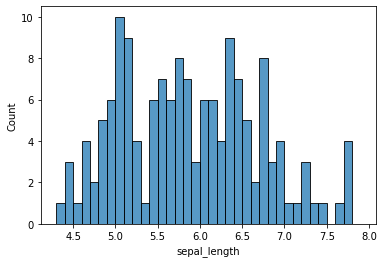

In [12]:
sns.histplot(data="iris", x=iris.sepal_length,binwidth=0.1)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

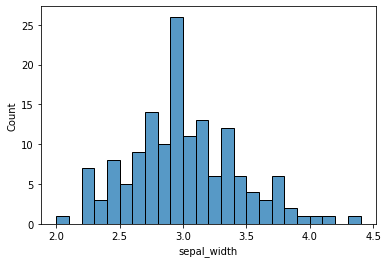

In [15]:
sns.histplot(data="iris", x=iris.sepal_width,binwidth=0.1)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

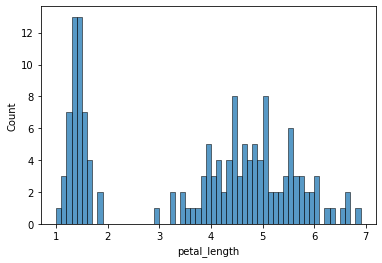

In [16]:
sns.histplot(data="iris", x=iris.petal_length,binwidth=0.1)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

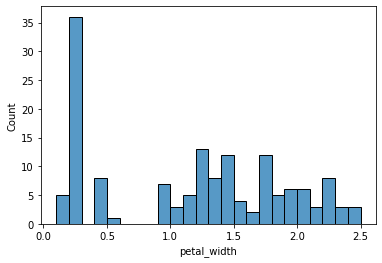

In [17]:
sns.histplot(data="iris", x=iris.petal_width,binwidth=0.1)

In [19]:
iris.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<AxesSubplot:>

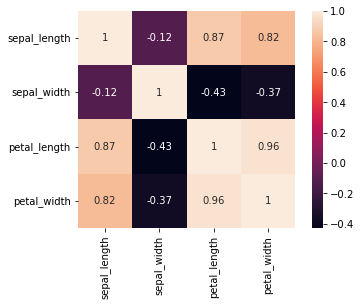

In [68]:
sns.heatmap(iris.corr(), robust=False, annot=True, square=True)

In [63]:
# sns.heatmap?

In [26]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [72]:
iris.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


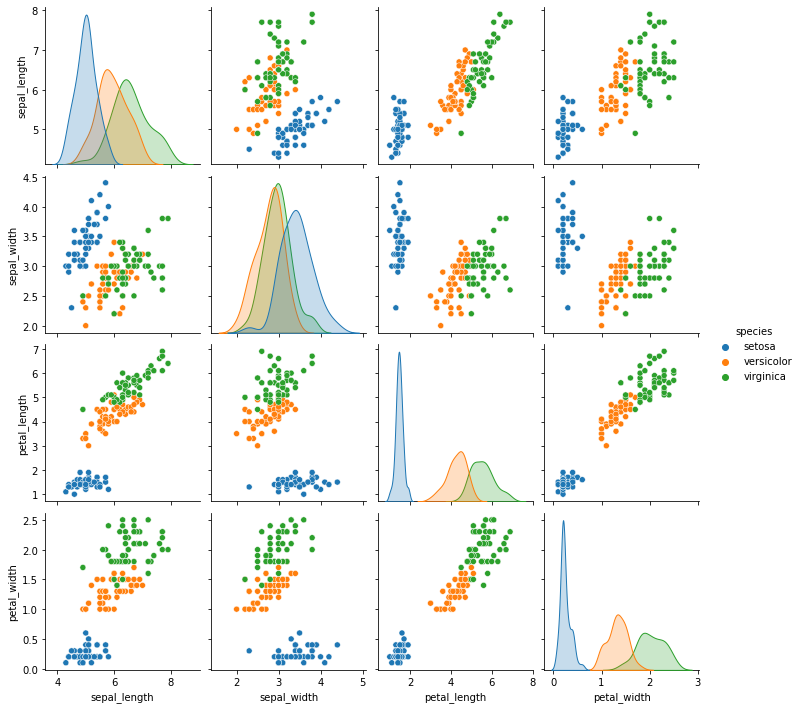

In [27]:
sns.pairplot(iris, hue='species');

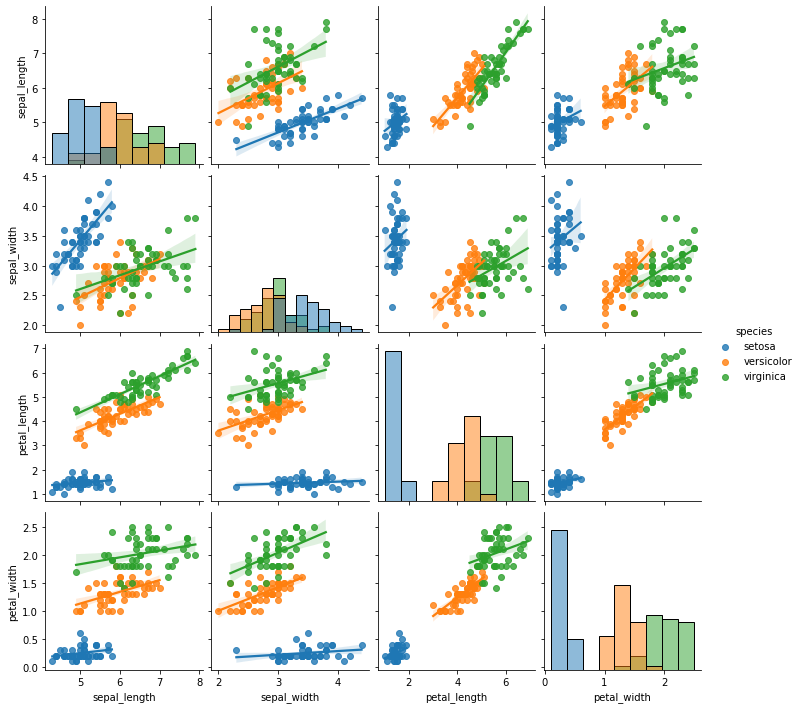

In [62]:
sns.pairplot(iris, hue='species', kind='reg',diag_kind="hist");

In [61]:
# sns.pairplot?

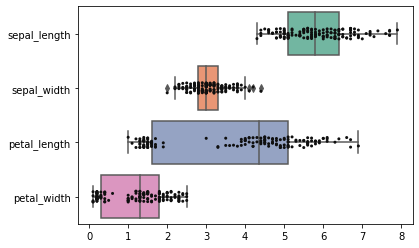

In [58]:
ax = sns.boxplot(data=iris, orient="h", palette="Set2")
ax = sns.stripplot(data=iris, color="0.06", orient="h", size=3)

In [28]:
# sns.boxplot?

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [74]:
X = iris.drop('species', axis=1)
X.shape

(150, 4)

In [75]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
Y = iris['species']
Y.shape

(150,)

In [77]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [80]:
Y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [82]:
Y.replace({"setosa":1, "versicolor":2, "virginica":3}, inplace=True)

In [83]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=42, test_size=0.25)

In [84]:
linear_model = LinearRegression()
linear_model.fit(Xtrain, ytrain)
Ypred = linear_model.predict(Xtest)

In [88]:
r2_score(ytest, Ypred)

0.9487283360348983